# INIT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [ ]:
resumeDataSet_test= resumeDataSet.copy()

In [ ]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [ ]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


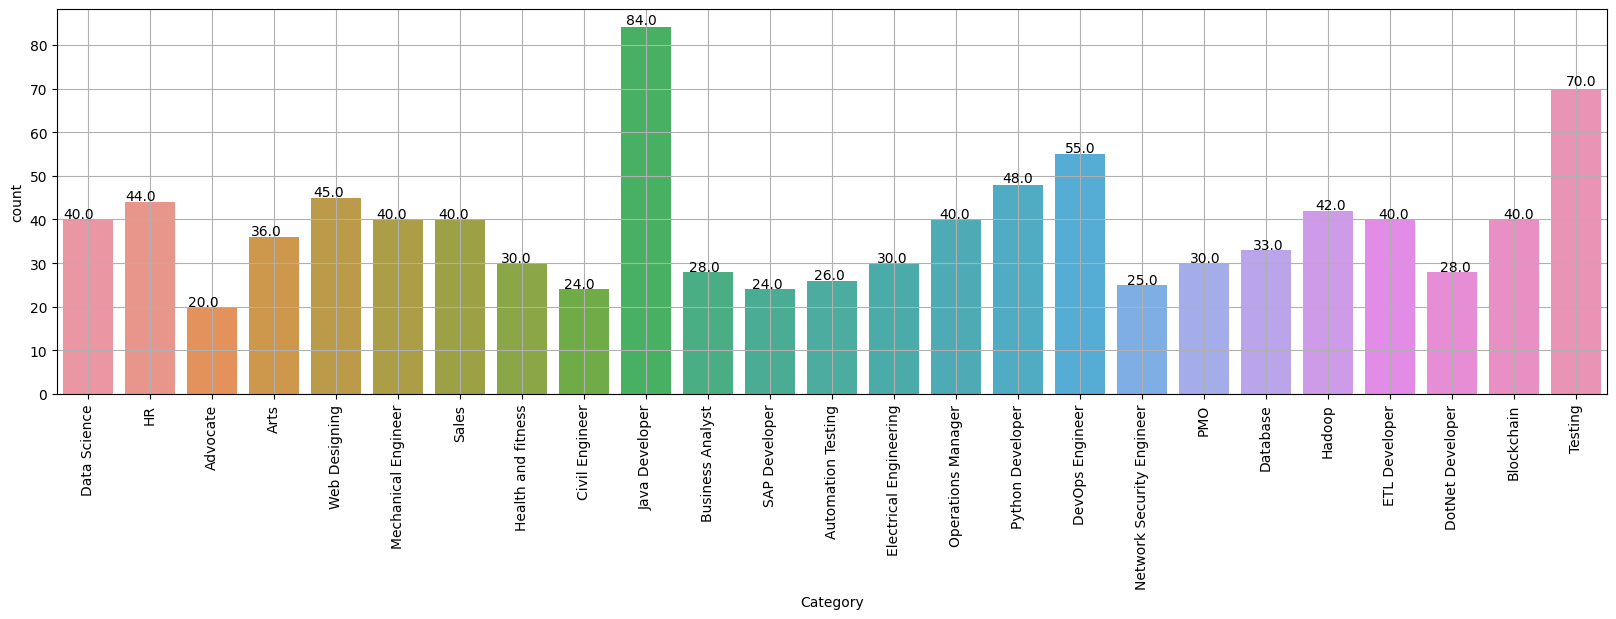

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

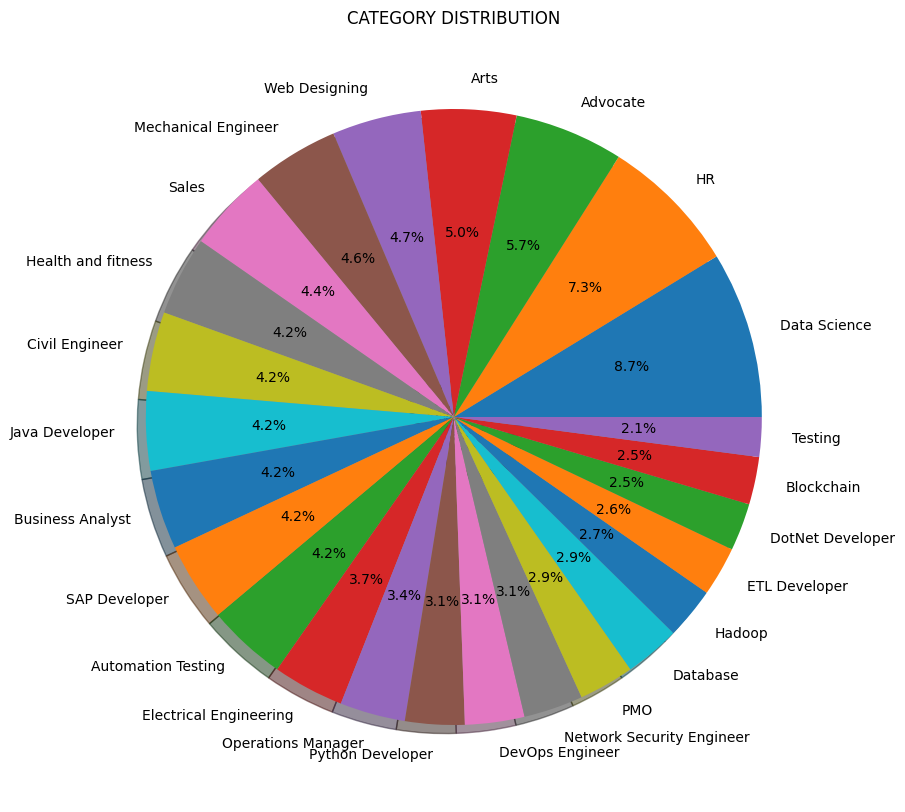

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

# CLEANING FUNC

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [ ]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
resumeDataSet_d=resumeDataSet.copy()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)



[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


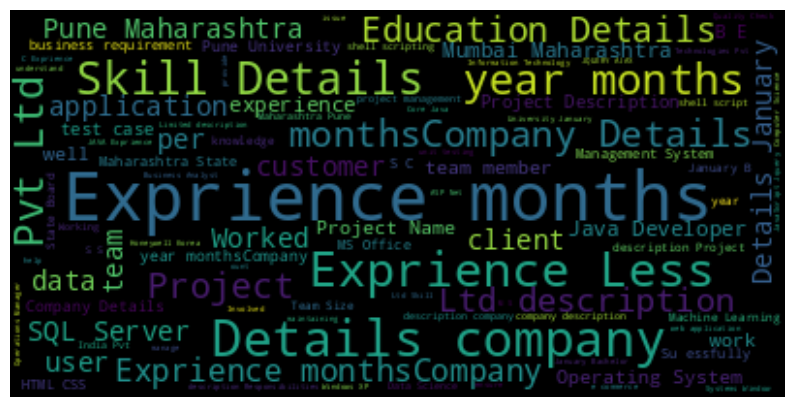

In [ ]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# HERE LEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [ ]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
# cell for cleaned dataset saving

In [ ]:
resumeDataSet.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [ ]:
viewing_df = pd.DataFrame(resumeDataSet.Category.value_counts())
viewing_df

In [ ]:
resumeDataSet_test.Category.value_counts() #understanding decode LabelEncoder

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [ ]:
viewing_df2 = pd.DataFrame(resumeDataSet_test.Category.value_counts())
viewing_df2

# VIEWING HERE

In [ ]:
viewer_df= pd.read_csv('/content/categoryvsLEcategory.csv') # stored in excel
viewer_df=viewer_df.sort_values(by='LE Category')

# LE used alphabetical order only so categories are by order
print(viewer_df)

                     JOB ROLE  COUNT  LE Category
24                   Advocate     20            0
13                       Arts     36            1
20         Automation Testing     26            2
7                  Blockchain     40            3
18           Business Analyst     28            4
23             Civil Engineer     24            5
10               Data Science     40            6
14                   Database     33            7
2             DevOps Engineer     55            8
19           DotNet Developer     28            9
8               ETL Developer     40           10
15     Electrical Engineering     30           11
5                          HR     44           12
6                      Hadoop     42           13
16         Health and fitness     30           14
0              Java Developer     84           15
12        Mechanical Engineer     40           16
21  Network Security Engineer     25           17
9          Operations Manager     40           18


In [ ]:
del resumeDataSet_d #clearing the space occupied 

# reqText and reqTarget created > Train test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
 
# creating the reqtext and reqtarget
requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

# vectorizing reqText
word_vectorizer = TfidfVectorizer( sublinear_tf=True, stop_words='english')
word_vectorizer.fit(requiredText)

# thenn   transforming reqText
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

# where X= word features (vect and trans) and y is reqtarget (L_Encoding)
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


In [ ]:
X_test[0]

<1x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 152 stored elements in Compressed Sparse Row format>

# ONEVSREST MODEL 

In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))
# ten minute runtime

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98


In [ ]:
%%time
clf.predict(X_test[1]) 

CPU times: user 927 ms, sys: 7.97 ms, total: 935 ms
Wall time: 500 ms


array([14])

# PIPELINE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack
import re
import pickle

# Load data
resumeDataSet_p = pd.read_csv('UpdatedResumeDataSet.csv')
resumeDataSet_p['cleaned_resume'] = ''

# Clean data
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet_p['cleaned_resume'] = resumeDataSet_p.Resume.apply(lambda x: cleanResume(x))

# Label Encoding
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet_p[i] = le.fit_transform(resumeDataSet_p[i])

# Set up pipeline
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
clf = OneVsRestClassifier(KNeighborsClassifier())
pipeline = Pipeline([
    ('tfidf', word_vectorizer),
    ('clf', clf)
])

# Split data
X = resumeDataSet_p['cleaned_resume'].values
y = resumeDataSet_p['Category'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True, stratify=y)

# Fit pipeline
pipeline.fit(X_train, y_train)



# Save pipeline
with open('resume_pipeline1.pkl', 'wb') as file:  # changed to resume_pipeline1 for testing purposes
    pickle.dump(pipeline, file)


In [ ]:
cat_14 = resumeDataSet_p[resumeDataSet_p['Category'] == 14]
cat_14.head() #for testing purposes only do not perform write here

,Category,Resume,cleaned_resume
265,14,Education Details \r\nJanuary 1992 to January ...,Education Details January 1992 to January 2003...
266,14,Education Details \r\nJanuary 2018 M.S. Nutrit...,Education Details January 2018 M S Nutrition a...
267,14,Personal Skills: â¢ Good verbal and written c...,Personal Skills Good verbal and written commun...
268,14,SKILLS: Computer: â¢ Can easily operate in Op...,SKILLS Computer Can easily operate in Operatin...
269,14,Education Details \r\nJanuary 2009 P.G. Sports...,Education Details January 2009 P G Sports scie...


In [ ]:
cat_14.iloc[2]['Resume'] 
resume_list = [cat_14.iloc[2]['Resume']]  # for extraction purposes only

In [ ]:
cat_14.to_csv('cat_14.csv')


# Test 1 successful ✅

In [ ]:
%%time
pipeline_output = pipeline.predict(resume_list)
pipeline_output

CPU times: user 1.19 s, sys: 0 ns, total: 1.19 s
Wall time: 902 ms


array([14])

# Test 2

In [ ]:
%%time
import pickle

with open('/content/resume_pipeline.pkl', 'rb') as f:
    pipeline = pickle.load(f)

# Make predictions on new data
new_data = resume_list
predictions = pipeline.predict(new_data)
print(predictions)


[14]
CPU times: user 916 ms, sys: 42 ms, total: 958 ms
Wall time: 556 ms


In [ ]:
# predictions
label = le.inverse_transform(predictions)
# print the label
print(label)

['Health and fitness']


In [ ]:
# predictions
labelofnumber = le.fit_transform(label)
# print the label
print(labelofnumber)

[0]


***Less than a second to run our entire pipeline of vectorizing, transforming & predicting***

> Test 2 successful✅



In [ ]:
import pickle
with open('model_KNC.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [ ]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.89      1.00      0.94         8
           7       1.00      0.86      0.92         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.

# Ranking  part

In [ ]:
new_rlist=[cat_14.iloc[2]['Resume'], cat_14.iloc[3]['Resume'], cat_14.iloc[4]['Resume'],cat_14.iloc[5]['Resume']]

In [ ]:
# predict probabilities of input belonging to each category
proba = pipeline.predict_proba(new_rlist)  #here csv, pipeline word is the model abhi wala resume_pipeline  //    HR input  of csv

# get the probability of the desired category (replace 14 with the desired category)

desired_proba = proba[:, 14]  # input health and fitness   //    HR input of category

# sort the indices of the input by their probability of belonging to the desired category
ranked_indices = np.argsort(desired_proba)[::-1]

# print the ranked indices and their corresponding probabilities
for i, idx in enumerate(ranked_indices):
    print(f"Rank {i+1}: Index {idx}, Probability {desired_proba[idx]}")


Rank 1: Index 3, Probability 1.0
Rank 2: Index 0, Probability 1.0
Rank 3: Index 2, Probability 0.8
Rank 4: Index 1, Probability 0.8


In [ ]:
new_rlist=[cat_14.iloc[2]['Resume'], cat_14.iloc[3]['Resume'], cat_14.iloc[4]['Resume'],cat_14.iloc[5]['Resume']]
# predict probabilities of input belonging to each category
proba = pipeline.predict_proba(new_rlist)

# get the probability of the desired category (replace 14 with the desired category)
desired_proba = proba[:, 14]

# sort the indices of the input by their probability of belonging to the desired category
ranked_indices = np.argsort(desired_proba)[::-1]

# print the ranked indices and their corresponding probabilities, along with the resume text
print(f"Rank\tProbability\tResume")
for i, idx in enumerate(ranked_indices):
    print(f"{i+1}\t{desired_proba[idx]}\t\t{new_rlist[idx]}")


this code runs✅ but text output looks messy 

In [ ]:
pip install fpdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40719 sha256=d966bba7f16596de59d8d10991755314a800c659312ec23accf25c9ccc820dd1
  Stored in directory: /root/.cache/pip/wheels/44/35/8b/86ce00cec7e4d13c5f189680ae0fa82f919bedc066c2cddae9
Successfully built fpdf


In [ ]:
from fpdf import FPDF

new_rlist=[cat_14.iloc[2]['Resume'], cat_14.iloc[3]['Resume'], cat_14.iloc[4]['Resume'],cat_14.iloc[5]['Resume']]
# predict probabilities of input belonging to each category
proba = pipeline.predict_proba(new_rlist)

# get the probability of the desired category (replace 14 with the desired category)
desired_proba = proba[:, 14]

# sort the indices of the input by their probability of belonging to the desired category
ranked_indices = np.argsort(desired_proba)[::-1]

# create PDF for each resume in ranked list
for i, idx in enumerate(ranked_indices):
    # print the rank, probability, and resume text
    print(f"Rank {i+1}: Index {idx}, Probability {desired_proba[idx]}")
    print(f"Resume:\n{new_rlist[idx]}\n")
    
    # create PDF with the resume text
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=new_rlist[idx], ln=1)
    pdf.output(f"rank_{i+1}_resume.pdf")


in above code ^^^^^  pdf output but on one line

In [ ]:
import pickle

with open('/content/resume_pipeline.pkl', 'rb') as f:
    pipeline = pickle.load(f)

In [ ]:
from fpdf import FPDF

class PDF(FPDF):
    def resume_section(self, resume):
        self.set_font('Arial', 'B', 14)
        self.cell(0, 10, 'Resume', 0, 1)
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, resume, 0, 1, 'L')
        self.ln()

# new_rlist is dataset MYcv.csv here if u want
new_rlist=[cat_14.iloc[2]['Resume'], cat_14.iloc[3]['Resume'], cat_14.iloc[4]['Resume'],cat_14.iloc[5]['Resume']]

# predict probabilities of input belonging to each category
proba = pipeline.predict_proba(new_rlist)

# get the probability of the desired category (replace 14 with the desired category)
desired_proba = proba[:, 14]

# sort the indices of the input by their probability of belonging to the desired category
ranked_indices = np.argsort(desired_proba)[::-1]

pdf = PDF()
pdf.add_page()

# print the ranked indices and their corresponding probabilities, along with the resume text
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Ranking of Resumes', 0, 1)
pdf.ln()

pdf.set_font('Arial', 'B', 12)
pdf.cell(25, 10, 'Rank', 1)
pdf.cell(50, 10, 'Probability', 1)
pdf.cell(0, 10, 'Resume', 1)
pdf.ln()

for i, idx in enumerate(ranked_indices):
    rank = i+1
    prob = desired_proba[idx]
    resume = new_rlist[idx]
    pdf.cell(25, 10, str(rank), 1)
    pdf.cell(50, 10, str(prob), 1)
    pdf.resume_section(resume)
    pdf.ln()

pdf.output('resume_ranking.pdf', 'F')


''

Final pdf generation succesful ✅

# Category number to words reversing label encoding in output

# 